# COGS 108 - SAT Scores and Video Game Sales

# Overview

The question of whether playing video games affects one’s academic studies is commonly asked and researched but answers have varied on opposite ends of the spectrum. Our goal is to see whether there is any correlation between video game sales, an indicator of gaming, and SAT scores, a cursor towards academics, over the course of years 1980 to 2011. Using data numerating video game sales over the course of given years and publicly released SAT scores, different trend lines were created to illustrate that math scores increased over the time course while critical reading scores remained relatively stagnant, leading to a depiction of an overall increase in SAT scores along with the increase in video game sales. Because of these trendlines, we can say that there is a correlation between SAT scores and video game sales. However, it is impossible to say whether this correlation is attributed to gaming, as critical reading scores did not increase over the course of 30 years and other external factors could have played in a part in the increased SAT scores over the 30 year time course.  


# Names

- Yohan Kim 
- Ryan Tran 
- Matthew Kye 
- Alex Doo 

<a id='research_question'></a>
# Research Question

How do video game sales correlate with SAT scores in North America? How does this correlation change over time?

<a id='background'></a>

## Background & Prior Work

In today's age of growing technology, more and more people have access to computers, and subsequently video games. People of all ages spend hours upon hours playing video games. While potentially fun, video games take a lot of time away from more productive tasks. We specifically wanted to examine the correaltion between video game sales and average SAT scores. Prior to doing any background research, we initially thought that there would be a negative correaltion between video game sales and SAT scores. We speculated that higher video game sales would negatively affect SAT scores because increased video game sales implies increased time playing video games, which would take away time from studying for the SAT. However, after doing some background research, we realize that out intial thought may be incorrect. According to the Guardian, “Children who play online video games tend to do better in academic science, maths and reading tests". This would suggest that playing video games may be beneficial for something like the SAT. Furthermore, according to the New York Times, using video games in classrooms can be useful as a source of positive reinformcent, which would encourage kids to put more effort into education. Lastly, according to Psycology Today, the affect video games have on educational success is much lower than on would think, and the negative stigma behind video games should be lowered as video games have very little impact on performace in the classroom. Because of the background research we found, we now have switched our stance and theorize that video game sales have a postive correaltion with SAT scores, meaning that SAT scores should go up as video game sales increase. 

* Reference - https://www.psychologytoday.com/us/blog/media-spotlight/201809/video-games-school-success-and-your-child 
* Reference - https://www.nytimes.com/2010/09/19/magazine/19video-t.html 
* Reference - https://www.theguardian.com/technology/2016/aug/08/positive-link-between-video-games-and-academic-performance-study-suggests#:~:text=The%20study%20found%20that%20students,the%20cause%20of%20the%20improvement.

# Hypothesis


* We hypothesize that there will be a positive correlation between a high volume of video game sales and higher SAT scores. Based on the background information from our research there appears to be a positive correlation between video games and academic performance. 

# Dataset(s)

- Dataset Name: Video Game Sales (vgsales.csv)
- Link to the dataset:https://www.kaggle.com/gregorut/videogamesales
- Number of observations: 16598

This dataset contains information on video game sales. It contains information on what the name of the video game is, year of release, nubmer of sales, genre, platform, ect. 

- Dataset Name: SAT scores
- Link to the dataset:https://secure-media.collegeboard.org/digitalServices/pdf/research/cbs2011_total_group_report.pdf
- Number of observations: 40 (40 years of data)

This dataset contains information on SAT scores from the years of 1972 through 2011. It has separates scores for each section of the SAT. The file that we found is posted as a PDF, but we will convert it into a csv so that it can be read and manipulated using pandas. 

In [32]:
# For DataFrame
import pandas as pd
import numpy as np
# For Visualization
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

import warnings
warnings.filterwarnings('ignore')

# Statmodels & patsy
import patsy
import statsmodels.api as sm

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

In [6]:
#first we will convert the PDF of SAT scores into a csv
IN = open("SAT.txt", "r")
title = IN.readline().rstrip()
lis = [""]*40
for i in range(400):
    ind = i%40
    cur = IN.readline().rstrip()
    cur = str(cur)
    lis[ind] = str(lis[ind]) + cur + ","
for i in range(len(lis)):
    lis[i] = lis[i][:-1]
print(title)
for i in lis:
    print(i)
#take the output and make it a csv file

year,CRMale,CRFemale,CRTotal,MathMale,MathFemale,MathTotal,WritingMale,WritingFemale,WritingTotal
1972,531,529,530,527,489,509,-,-,-
1973,523,521,523,525,489,506,-,-,-
1974,524,520,521,524,488,505,-,-,-
1975,515,509,512,518,479,498,-,-,-
1976,511,508,509,520,475,497,-,-,-
1977,509,505,507,520,474,496,-,-,-
1978,511,503,507,517,474,494,-,-,-
1979,509,501,505,516,473,493,-,-,-
1980,506,498,502,515,473,492,-,-,-
1981,508,496,502,516,473,492,-,-,-
1982,509,499,504,516,473,493,-,-,-
1983,508,498,503,516,474,494,-,-,-
1984,511,498,504,518,478,497,-,-,-
1985,514,503,509,522,480,500,-,-,-
1986,515,504,509,523,479,500,-,-,-
1987,512,502,507,523,481,501,-,-,-
1988,512,499,505,521,483,501,-,-,-
1989,510,498,504,523,482,502,-,-,-
1990,505,496,500,521,483,501,-,-,-
1991,503,495,499,520,482,500,-,-,-
1992,504,496,500,521,484,501,-,-,-
1993,504,497,500,524,484,503,-,-,-
1994,501,497,499,523,487,504,-,-,-
1995,505,502,504,525,490,506,-,-,-
1996,507,503,505,527,492,508,-,-,-
1997,507,503,505,530,494,51

In [7]:
#read the SAT csv and head
SATdf = pd.read_csv("SAT.csv")
SATdf.head()

,year,CRMale,CRFemale,CRTotal,MathMale,MathFemale,MathTotal,WritingMale,WritingFemale,WritingTotal
0,1972,531,529,530,527,489,509,-,-,-
1,1973,523,521,523,525,489,506,-,-,-
2,1974,524,520,521,524,488,505,-,-,-
3,1975,515,509,512,518,479,498,-,-,-
4,1976,511,508,509,520,475,497,-,-,-


In [8]:
#read the Video game csv and head
VGdf = pd.read_csv("vgsales.csv")
VGdf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
#The SAT dataset has missing data for the writing section scores as years before 2006 did not have a writing section
#Therefore, we will remove the writing section data as it is not full and would make the years of 
#1971-2005 have lower scores than the years from 2006-2001

SATdf = SATdf[["year", "CRMale", "CRFemale", "CRTotal", "MathMale", "MathFemale", "MathTotal"]]
SATdf.head()

,year,CRMale,CRFemale,CRTotal,MathMale,MathFemale,MathTotal
0,1972,531,529,530,527,489,509
1,1973,523,521,523,525,489,506
2,1974,524,520,521,524,488,505
3,1975,515,509,512,518,479,498
4,1976,511,508,509,520,475,497


In [10]:
#since our project is aimed at determining correaltion between SAT scores and Videogame sales, we will not 
#be splitting up our scores based on gender. Therefore, we will just be using the total/average score

SATdf = SATdf[["year", "CRTotal", "MathTotal"]]
SATdf.head()

,year,CRTotal,MathTotal
0,1972,530,509
1,1973,523,506
2,1974,521,505
3,1975,512,498
4,1976,509,497


In [11]:
#We want to look at the agregate SAT scores and not have them broken down by Critical Reading and Math

sum_column = SATdf["CRTotal"] + SATdf["MathTotal"]
SATdf["TotScore"] = sum_column
SATdf.head()

,year,CRTotal,MathTotal,TotScore
0,1972,530,509,1039
1,1973,523,506,1029
2,1974,521,505,1026
3,1975,512,498,1010
4,1976,509,497,1006


In [12]:
#only keep the years that are greater than 1980 since videogame sale data starts from 1980
SATdf = SATdf[SATdf["year"] >= 1980]
SATdf.head()

,year,CRTotal,MathTotal,TotScore
8,1980,502,492,994
9,1981,502,492,994
10,1982,504,493,997
11,1983,503,494,997
12,1984,504,497,1001


In [13]:
#Since we are only looking at SAT scores in North America, we will only use video game sales in NA
#We also do not need rank, platform, genre, or publisher

VGdf = VGdf[["Name", "Year", "NA_Sales"]]
VGdf.head()

,Name,Year,NA_Sales
0,Wii Sports,2006.0,41.49
1,Super Mario Bros.,1985.0,29.08
2,Mario Kart Wii,2008.0,15.85
3,Wii Sports Resort,2009.0,15.75
4,Pokemon Red/Pokemon Blue,1996.0,11.27


In [14]:
#get the number of sales of video games per year
#from 1980 to 2011 since SAT scores only go up to 2011
Sales = dict()
for i in range(1980, 2012):
    work = VGdf[VGdf.Year == i]
    sums = work["NA_Sales"].sum()
    Sales[i] = sums
years = []
numSale = []
for i in Sales:
    years.append(i)
    numSale.append(Sales[i])
d = {'year': years, "Sales": numSale}
VGFindf = pd.DataFrame(data = d)
VGFindf.head()

,year,Sales
0,1980,10.59
1,1981,33.40
2,1982,26.92
3,1983,7.76
4,1984,33.28


In [15]:
#Final Dataset
Finaldf = pd.merge(SATdf, VGFindf, on='year')
Finaldf.head()

,year,CRTotal,MathTotal,TotScore,Sales
0,1980,502,492,994,10.59
1,1981,502,492,994,33.40
2,1982,504,493,997,26.92
3,1983,503,494,997,7.76
4,1984,504,497,1001,33.28


In [16]:
print(Finaldf)


    year  CRTotal  MathTotal  TotScore   Sales
0   1980      502        492       994   10.59
1   1981      502        492       994   33.40
2   1982      504        493       997   26.92
3   1983      503        494       997    7.76
4   1984      504        497      1001   33.28
5   1985      509        500      1009   33.73
6   1986      509        500      1009   12.50
7   1987      507        501      1008    8.46
8   1988      505        501      1006   23.87
9   1989      504        502      1006   45.15
10  1990      500        501      1001   25.46
11  1991      499        500       999   12.76
12  1992      500        501      1001   33.87
13  1993      500        503      1003   15.12
14  1994      499        504      1003   28.15
15  1995      504        506      1010   24.82
16  1996      505        508      1013   86.76
17  1997      505        511      1016   94.75
18  1998      505        512      1017  128.36
19  1999      505        511      1016  126.06
20  2000     

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [17]:
# Things to consider:
# 1. Structure    - "Shape" of the dataset
# 2. Granularity  - what each observation in your data represents
# 3. Scope        - describes how helpful these data are with respect to our data science question
# 4. Temporality  - refers to how the data are situated in time. 
# 5. Faithfulness - How the data is a determination of how trustworthy the datas are

## Structure
* Our data format was in csv, and converted into dataframe.
* In each columns, we have
    * year       - The year (baseline) for both SAT scores and Video Game Sales (in integer)
    * CRTotal    - SAT's English portion Score, Averaged out by whole nationwide (in integer)
    * MathTotal  - SAT's Math portion Score, Averaged out by whole nationwide (in integer)
    * TotScore   - SAT's total score, added MathTotal and CRTotal to get nationwide's average SAT scores (in integer)
    * sales      - Videogame sale number in millions
* (*) all datas are already joined, so no need to join more

In [18]:
Finaldf.head()

,year,CRTotal,MathTotal,TotScore,Sales
0,1980,502,492,994,10.59
1,1981,502,492,994,33.40
2,1982,504,493,997,26.92
3,1983,503,494,997,7.76
4,1984,504,497,1001,33.28


At a glance, we can tell this is a **Tabular data** with **observations in rows and variables in columns**.

## Granularity
* Each row in our data contain **summary about a number of individuals**.
    * Also, all rows are **summary about a number of individuals** since our datasets are fully cleaned out thus each row is exactly as it is.
* Using this dataset, we are going to compare datsets by each row, view trends by each columns, and analyze

In [19]:
Finaldf.dtypes

year           int64
CRTotal        int64
MathTotal      int64
TotScore       int64
Sales        float64
dtype: object

In [20]:
Finaldf

,year,CRTotal,MathTotal,TotScore,Sales
0,1980,502,492,994,10.59
1,1981,502,492,994,33.40
2,1982,504,493,997,26.92
3,1983,503,494,997,7.76
4,1984,504,497,1001,33.28
5,1985,509,500,1009,33.73
6,1986,509,500,1009,12.50
7,1987,507,501,1008,8.46
8,1988,505,501,1006,23.87
9,1989,504,502,1006,45.15


## Temporality
* Reported times represent **time event occurred**.
    * Specifically, since we are taking data as a year, we ( Collegeboard / Video Game Dataset ) collected all datas throughout the year, and averaged it out, which makes our datset as **time event occurred**.
    * Since it only shows a year, there are no null timestamps represented.
* Using year as a x-axis, we plan to show scatterplot and lineplot

## Faithfulness
* Both SAT dataset and Videogame dataset do not show any unreasonable values
* However, we have to keep in mind that our datasets are quite old (10+ years from now), and might have some inconsistencies with inconsistencies with it:
    * For example, Collegeboard did not present neither tabular / nested data format. It had **AVERAGED** dataset with values in PDF format.
    * In Videogame's dataset, which was from Kaggle, it says that they scraped data from vgchartz.com, which is known to be a forum webpage about videogames, including # of sales for the videogames. In here, we might have inconsistencies because maybe the creator of this dataset might have programmed the scrape wrong. 
* Though there are no obvious signs of falsification, we need to be cautiuos when analyzing datasets.

### Missing Values

In [21]:
null_rows = Finaldf.isnull().any(axis=1)
print(Finaldf[null_rows])

Empty DataFrame
Columns: [year, CRTotal, MathTotal, TotScore, Sales]
Index: []


NO MISSING VALUES!

### Expected Values? Wild Outliers?

In [22]:
Finaldf.describe()

,year,CRTotal,MathTotal,TotScore,Sales
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1995.500000,503.406250,506.843750,1010.250000,117.686875
std,9.380832,3.221494,8.628944,9.490233,114.128153
min,1980.000000,497.000000,492.000000,994.000000,7.760000
25%,1987.750000,500.000000,500.750000,1002.500000,25.300000
50%,1995.500000,504.000000,507.000000,1010.500000,65.955000
75%,2003.250000,505.000000,514.000000,1016.250000,217.790000
max,2011.000000,509.000000,520.000000,1028.000000,351.440000


The observed values for each column of data seem to have no obvious outliers.

<AxesSubplot:xlabel='Sales', ylabel='Density'>

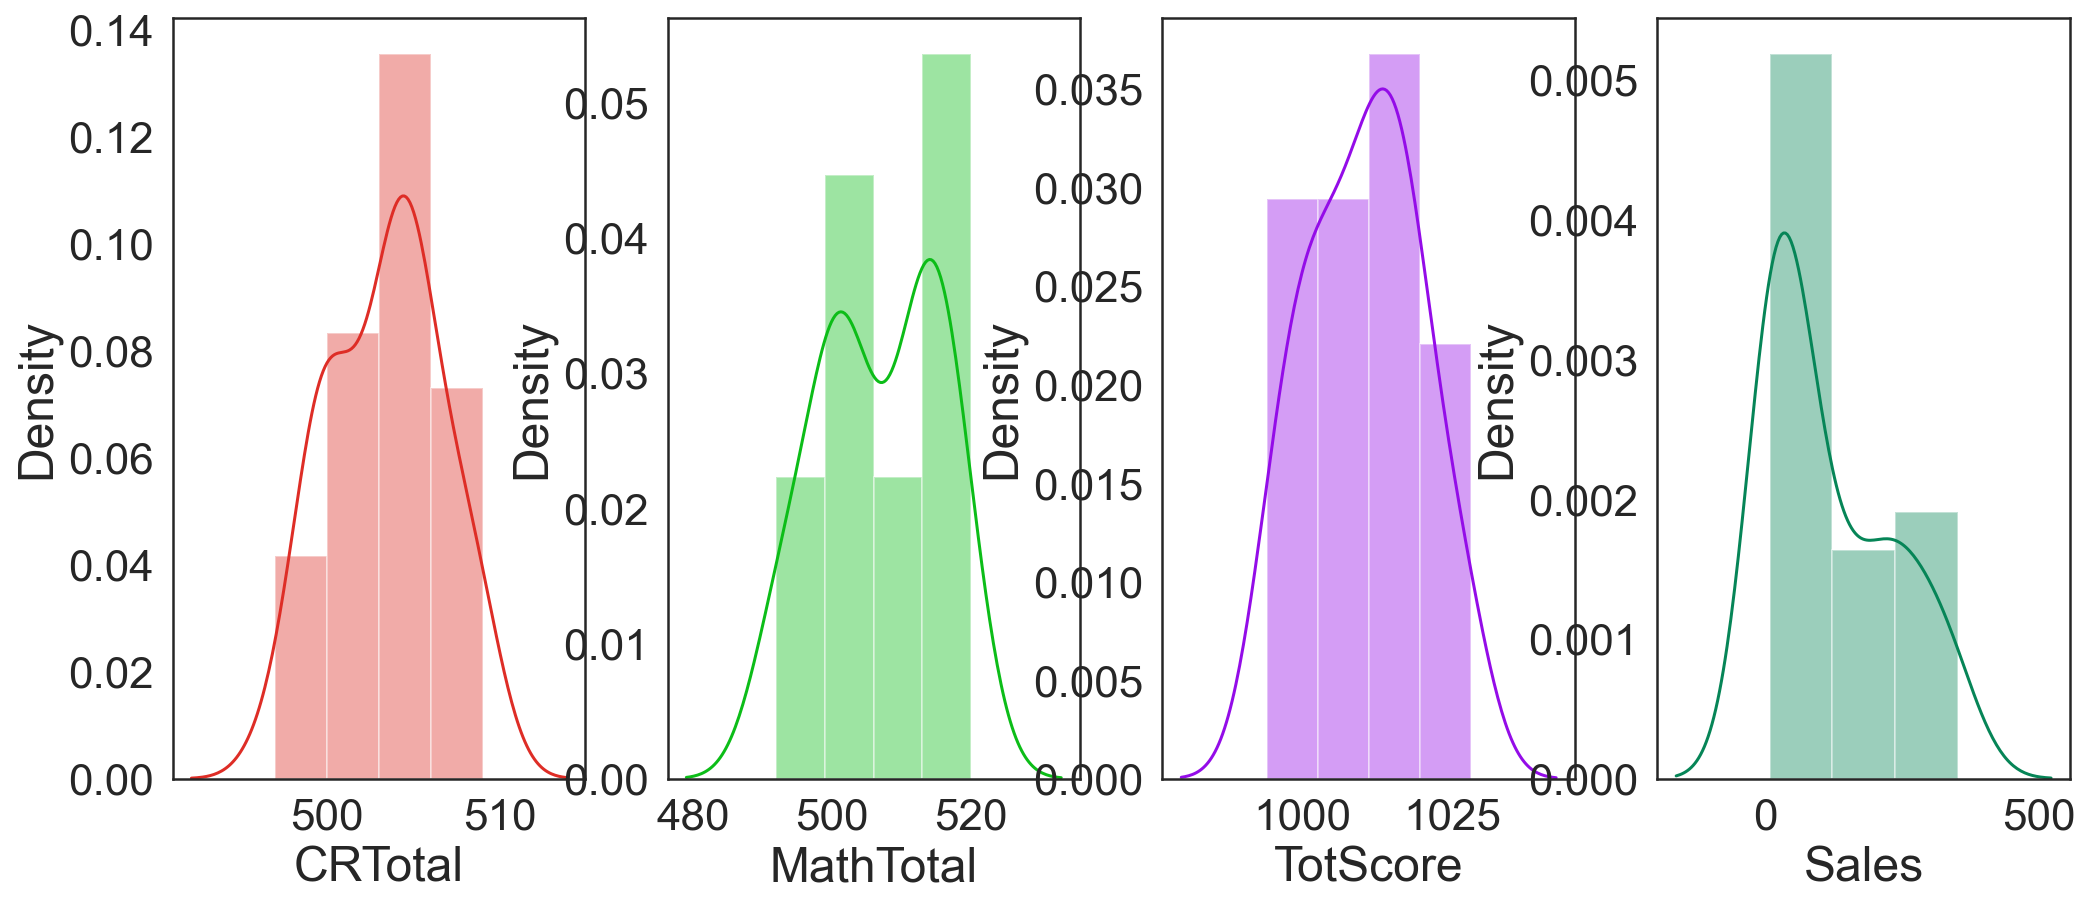

In [23]:
#Plot the histograms for Critical Reading scores, Math scores, total score, and number of slaes

plt.subplot(1,4,1)
sns.distplot(Finaldf['CRTotal'], color="#DE2D26")
plt.subplot(1,4,2)
sns.distplot(Finaldf['MathTotal'], color="#0CBD18")
plt.subplot(1,4,3)
sns.distplot(Finaldf['TotScore'], color="#940CE8")
plt.subplot(1,4,4)
sns.distplot(Finaldf['Sales'], color="#068557")

It appears that the critical reading scores and total scores have a roughly normal distribution. The math scores appear to have a bimodal distribution. The number of sales appears to be right skewed. None of the 4 histograms appear to have outliers.

### Scatterplot Matrix

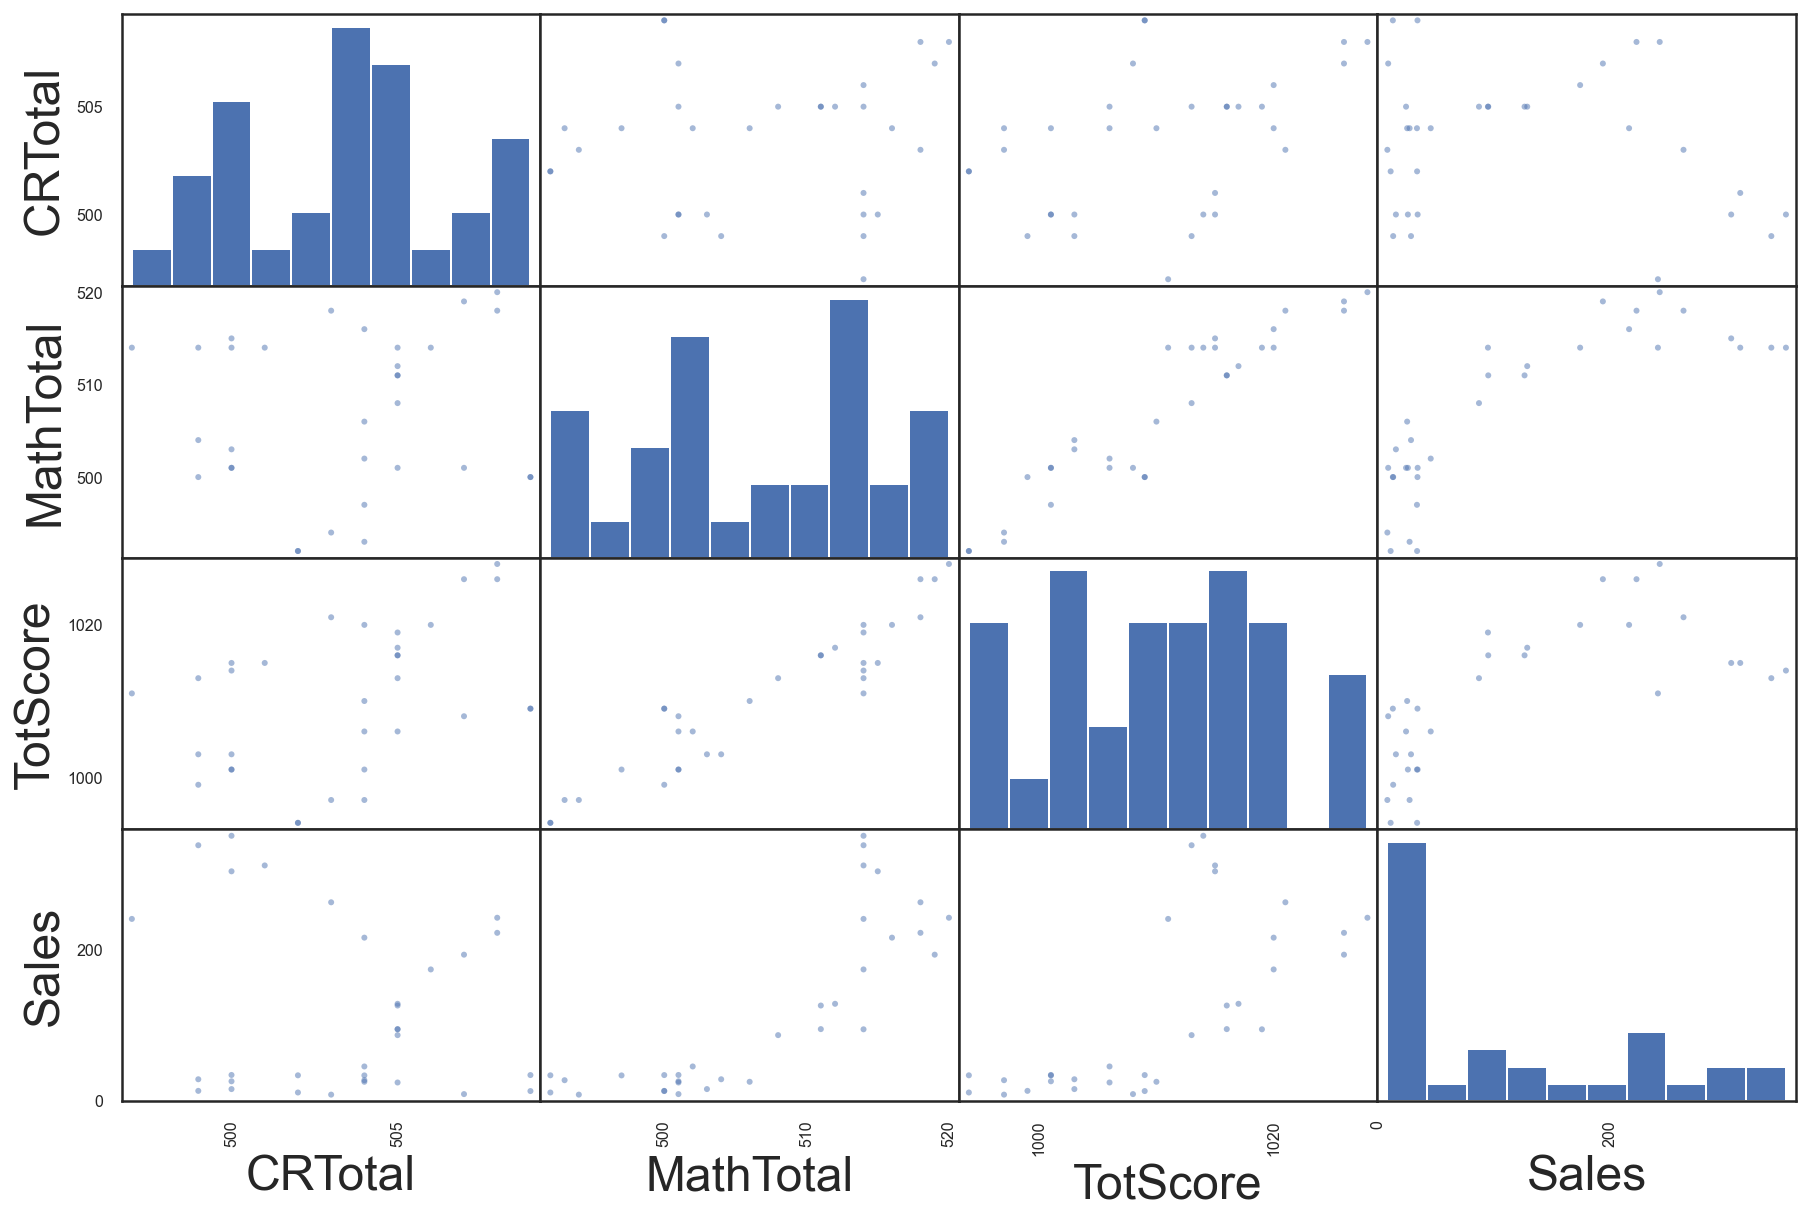

In [70]:
# generate scatter matrix
_ = pd.plotting.scatter_matrix(Finaldf[['CRTotal', 'MathTotal', 'TotScore', 'Sales']], figsize=(15, 10))

### Relationship between these variables

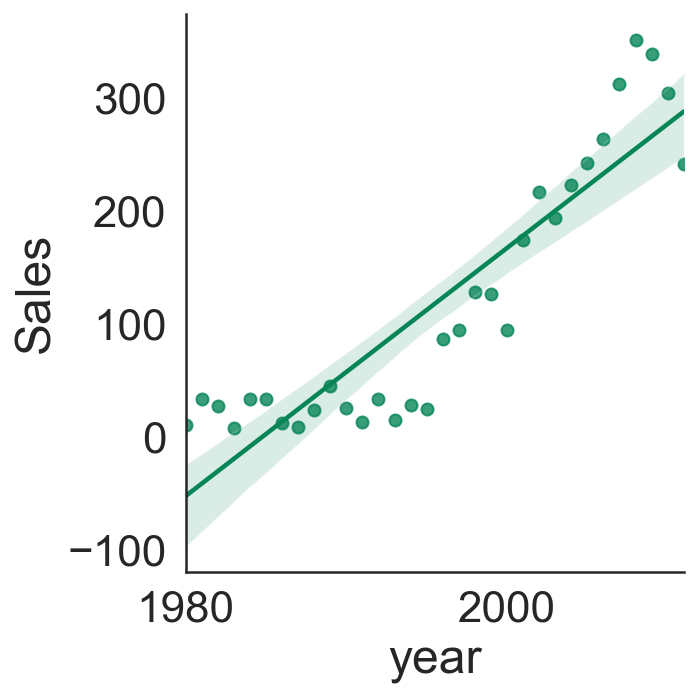

In [68]:
#make scatter plot for the number of video game sales per year
sns.lmplot(x='year', y='Sales', data=Finaldf, line_kws={'color': '#068557'}, scatter_kws = {'color': '#068557'})

There is a positive correlation between video game sales and year. This means that as the year increases so does the number of video games. 

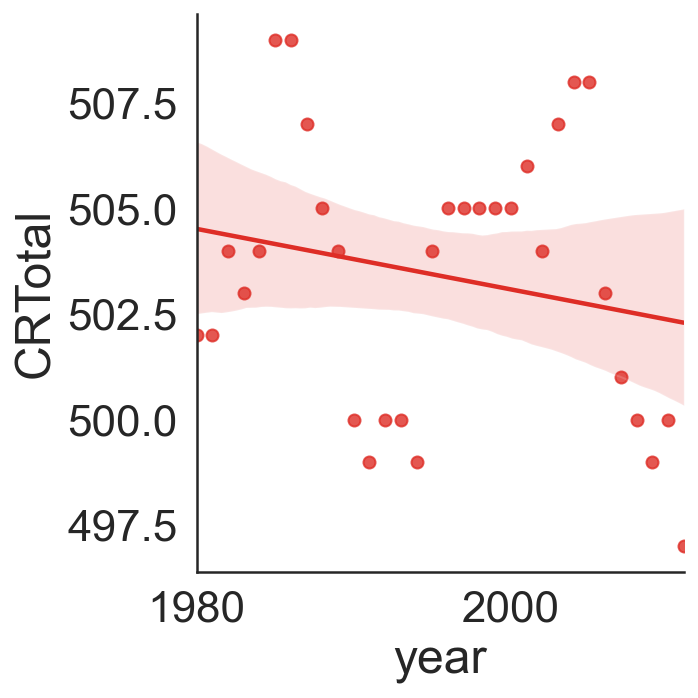

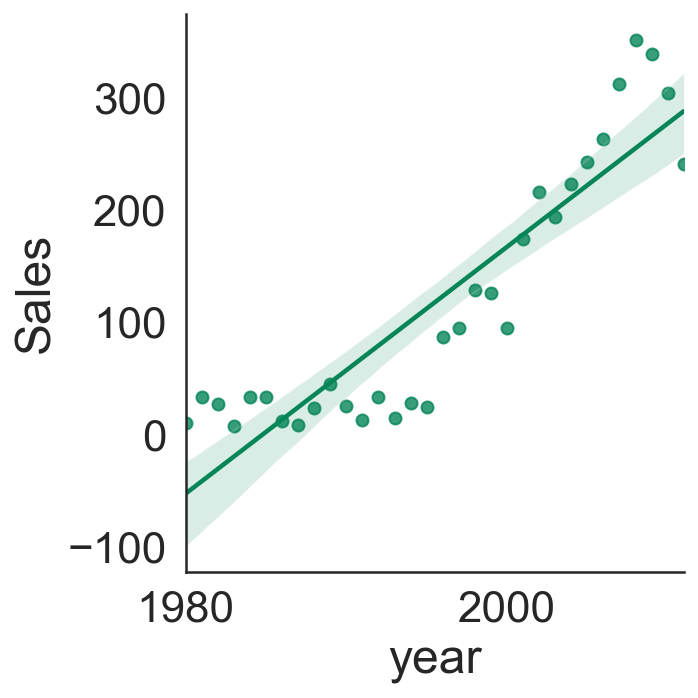

In [72]:
# lineplot for each columns to videogame sales
# 1. Videogame sales to SAT Critical Reading Score
sns.lmplot(x='year', y='CRTotal', data=Finaldf, line_kws={'color': '#DE2D26'}, scatter_kws = {'color': '#DE2D26'})
sns.lmplot(x='year', y='Sales', data=Finaldf, line_kws={'color': '#068557'}, scatter_kws = {'color': '#068557'})

The top plot is ths scatter plot for critical reading scores versus year, while the bottom plot is number of video sales versus year. Critical reading scores have a slight downward trend with respect to year, but stays roughly the same throughout the years. 

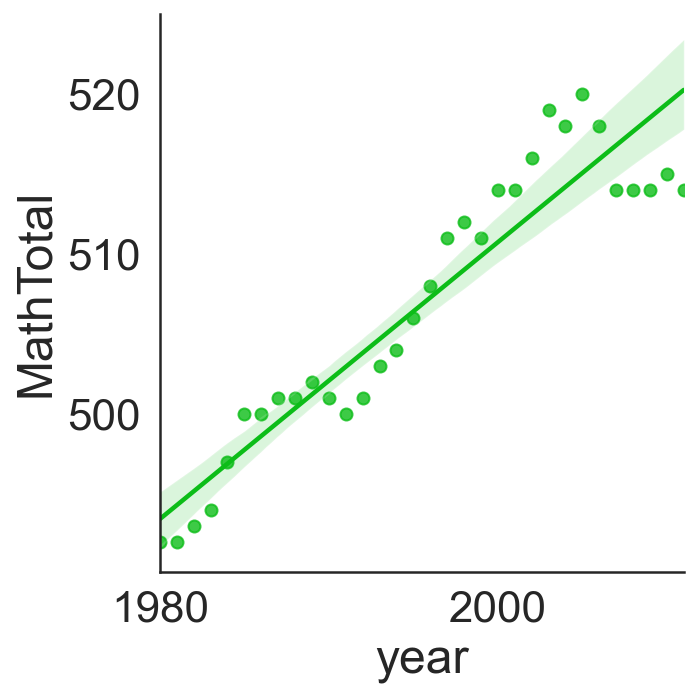

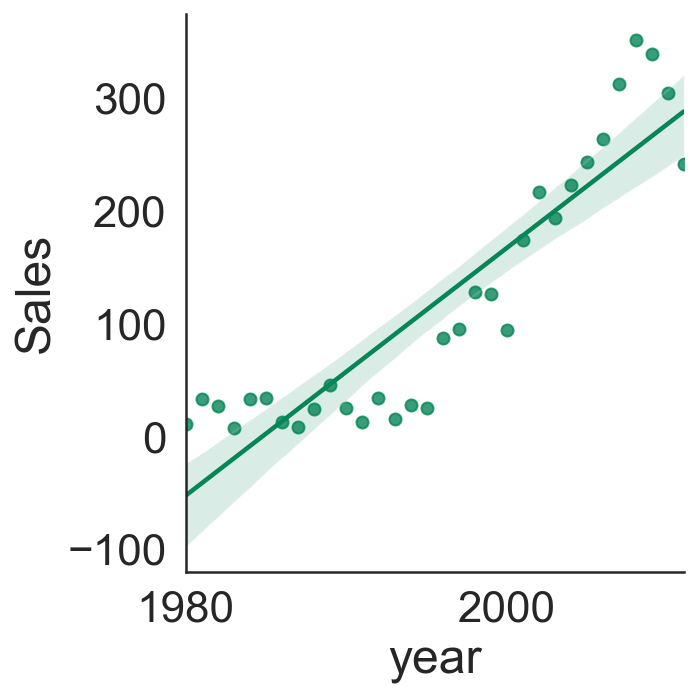

In [73]:
# 2. Videogame sales to SAT Math Score
sns.lmplot(x='year', y='MathTotal', data=Finaldf, line_kws={'color': '#0CBD18'}, scatter_kws = {'color': '#0CBD18'})
sns.lmplot(x='year', y='Sales', data=Finaldf,line_kws={'color': '#068557'}, scatter_kws = {'color': '#068557'})

The top plot is ths scatter plot for math scores versus year, while the bottom plot is number of video sales versus year. Math scores appear to have a postive trend with respect to year.

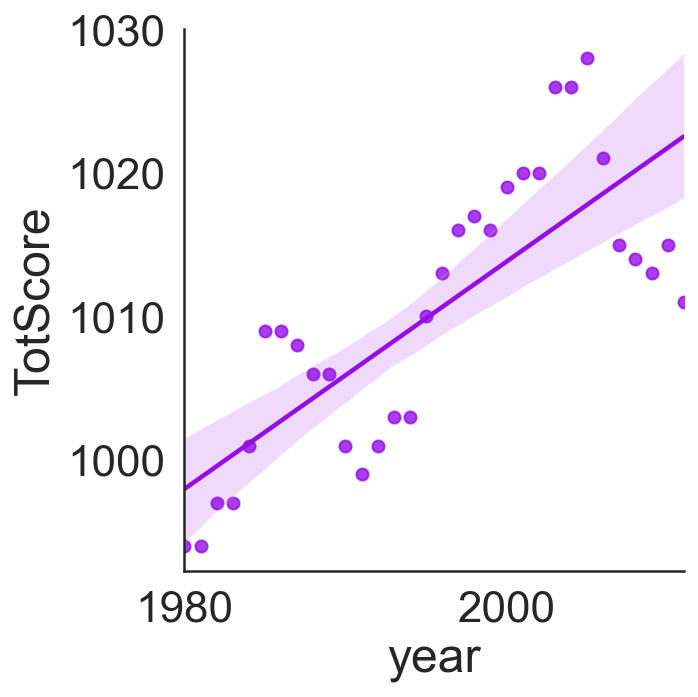

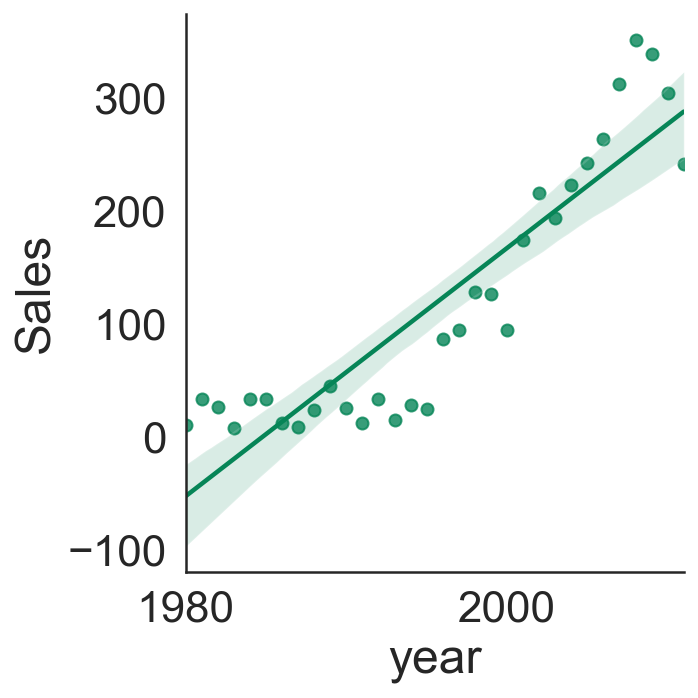

In [74]:
# 3. Videogame sales to Overall SAT score
sns.lmplot(x='year', y='TotScore', data=Finaldf, line_kws={'color': '#940CE8'}, scatter_kws = {'color': '#940CE8'})
sns.lmplot(x='year', y='Sales', data=Finaldf,line_kws={'color': '#068557'}, scatter_kws = {'color': '#068557'})

The top plot is ths scatter plot for total SAT score versus year, while the bottom plot is number of video sales versus year. Total SAT score appears to have a postive trend with respect to year. Likely due to increasing math scores. 

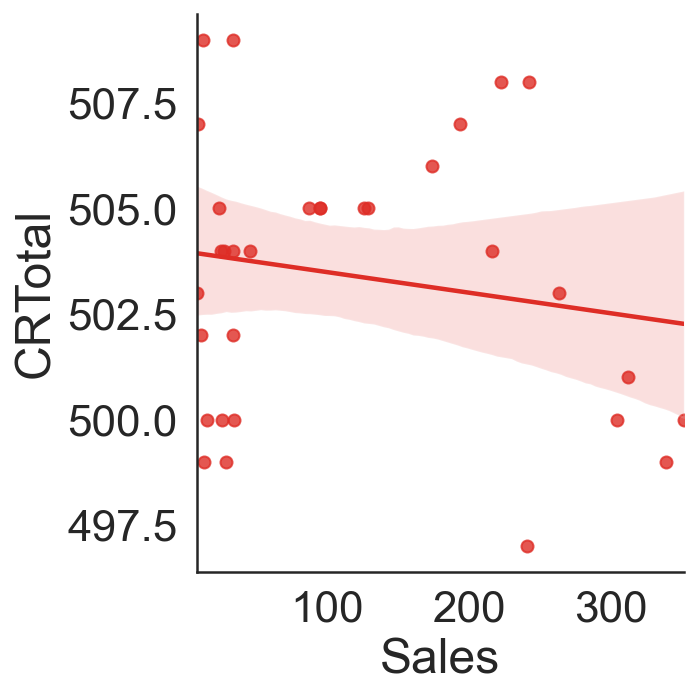

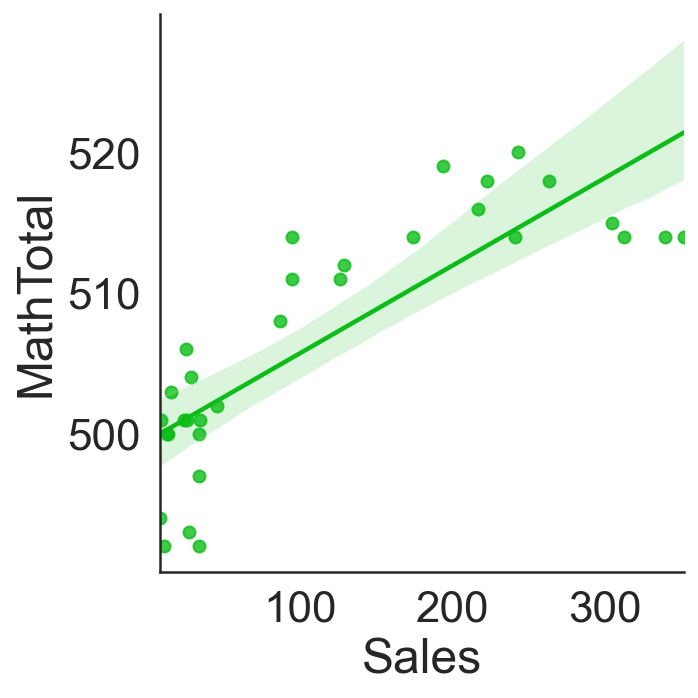

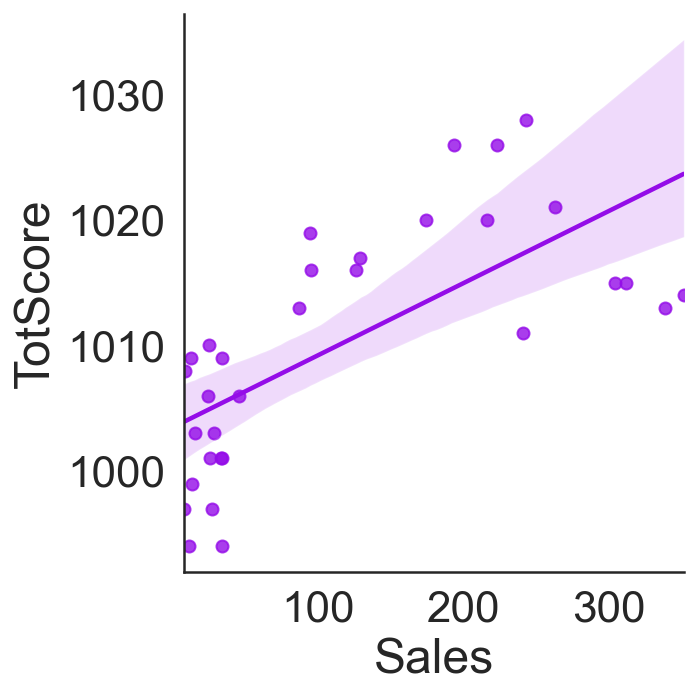

In [75]:
# 4. Videogame sales versus Scores
sns.lmplot(x='Sales', y='CRTotal', data=Finaldf, line_kws={'color': '#DE2D26'}, scatter_kws = {'color': '#DE2D26'})
sns.lmplot(x='Sales', y='MathTotal', data=Finaldf, line_kws={'color': '#0CBD18'}, scatter_kws = {'color': '#0CBD18'})
sns.lmplot(x='Sales', y='TotScore', data=Finaldf, line_kws={'color': '#940CE8'}, scatter_kws = {'color': '#940CE8'})

The top plot shows the relationship between critical reading scores and video game sales. The middle plot shows the relationship between math scores and video game sales. The bottom shows the relationship between SAT scores and video game sales. When it comes to critical reading scores, there appears to be very little to no correaltion between number of slaes and CR score. There appears to be a positve correlation between number of video game sales and math scores, and subsequently total SAT score. However, the trend line does not fit the data particularly for either math score or total score, which means that we will have to do statistical analysis to determine the true relationship between SAT scores and number of video game sales. 

# Data Analysis & Results

We will be doing statistical analysis on SAT scores and number of video game sales to determine if there is any correlation between the two. We will specifically use linear regression.

First we must declare our null and alternate hypothesis:

$H_o$: There is no relationship between video game sales and SAT scores ($\beta = 0$)

$H_a$: There is a relationship between video game sales and SAT scores ($\beta \ne 0$)

We will now do lineqar regression for critical reading scores versus video game sales, math scores versus video game sales, and to SAT scores versus video game sales. We will first do critical reading scores versus video game sales. 

                            OLS Regression Results                            
Dep. Variable:                CRTotal   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9194
Date:                Sun, 14 Mar 2021   Prob (F-statistic):              0.345
Time:                        15:42:48   Log-Likelihood:                -81.850
No. Observations:                  32   AIC:                             167.7
Df Residuals:                      30   BIC:                             170.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    503.9791      0.826    610.238      0.0

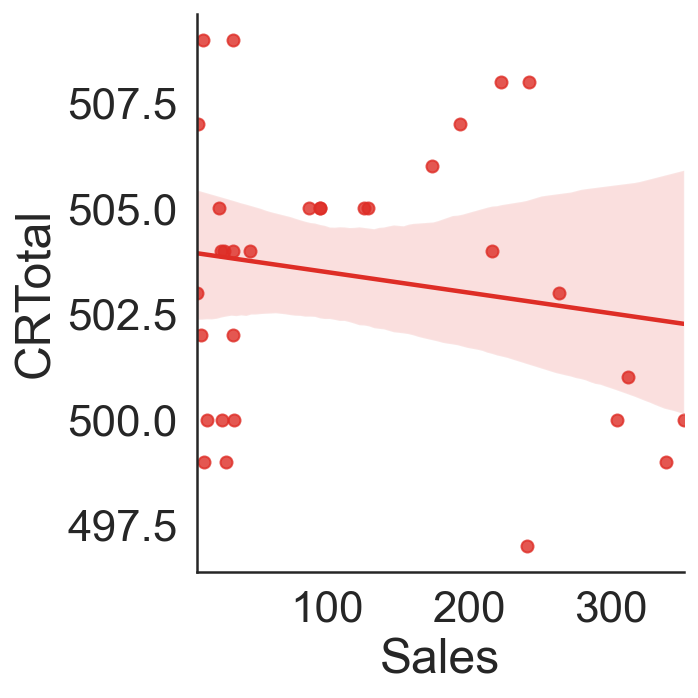

In [76]:
#linear regression for critical reading scores versus video game sales

#scatter plot of critical reading scores versus video game sales
sns.lmplot(x='Sales', y='CRTotal', data=Finaldf, line_kws={'color': '#DE2D26'}, scatter_kws = {'color': '#DE2D26'} )

#linear regression
outcome, predictors = patsy.dmatrices('CRTotal ~ Sales', Finaldf)
model = sm.OLS(outcome, predictors)
results = model.fit()

## look at the results
print(results.summary())

According to the linear regression model, the adjusted R-squared value is  -0.003, and the p-value is 0.345. This indicates that there is nearly no correlation between video game sales and critical readings scores as the r-squared value is almost 0, and the p-value is relativley large. 

Next will be linear regression for math scores versus video game sales.

                            OLS Regression Results                            
Dep. Variable:              MathTotal   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     63.42
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           6.88e-09
Time:                        15:43:04   Log-Likelihood:                -95.687
No. Observations:                  32   AIC:                             195.4
Df Residuals:                      30   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    499.5123      1.273    392.501      0.0

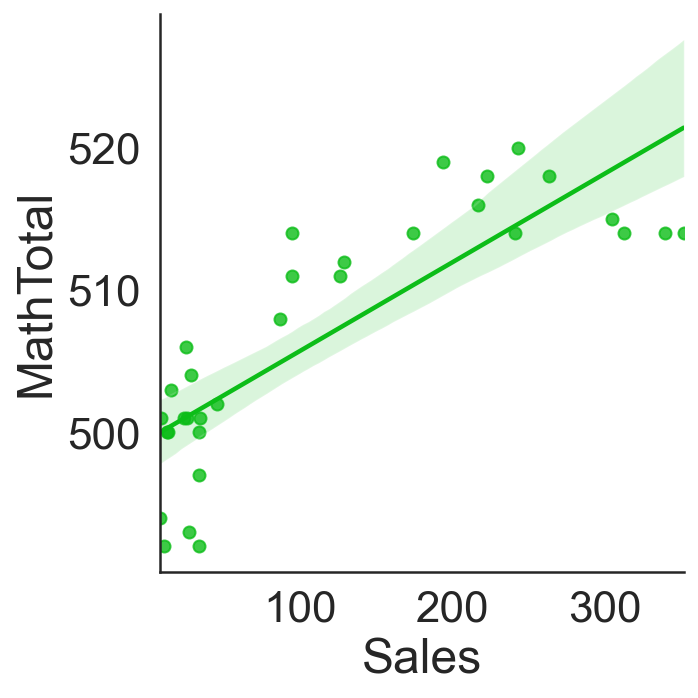

In [77]:
#linear regression for math scores versus video game sales

#scatter plot for math scores versus video game sales
sns.lmplot(x='Sales', y='MathTotal', data=Finaldf, line_kws={'color': '#0CBD18'}, scatter_kws = {'color': '#0CBD18'})

#linear regression
outcome, predictors = patsy.dmatrices('MathTotal ~ Sales', Finaldf)
model = sm.OLS(outcome, predictors)
results = model.fit()

## look at the results
print(results.summary())

According to the linear regression model, the adjusted R-squared value is  0.668, and the p-value is less than 0.05. This indicates that there is a positive correlation between video game sales and math scores as the r-squared value is significantly larger than 0 (0.668), and the p-value is significanly less than 0.05. Since the p-value is very small, this means that it would be very unlikely to observe this result due to random chance alone. 

Lastly we will do linear regression for SAT scores versus video game sales.

                            OLS Regression Results                            
Dep. Variable:               TotScore   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     27.36
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.22e-05
Time:                        15:43:17   Log-Likelihood:                -106.54
No. Observations:                  32   AIC:                             217.1
Df Residuals:                      30   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1003.4914      1.786    561.774      0.0

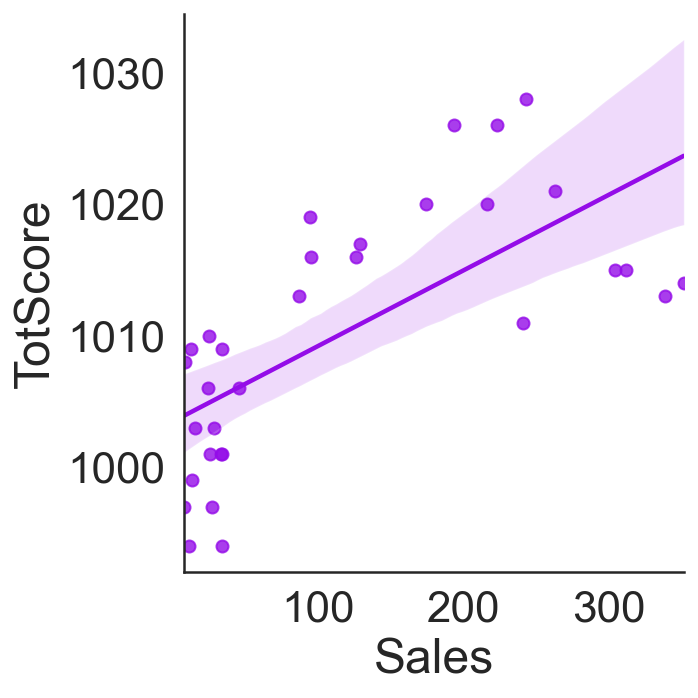

In [78]:
#linear regression for total SAT scores versus video game sales

#scatterplot for  total SAT scores versus video game sales
sns.lmplot(x='Sales', y='TotScore', data=Finaldf, line_kws={'color': '#940CE8'}, scatter_kws = {'color': '#940CE8'})

#linear regression
outcome, predictors = patsy.dmatrices('TotScore ~ Sales', Finaldf)
model = sm.OLS(outcome, predictors)
results = model.fit()

## look at the results
print(results.summary())

According to the linear regression model, the adjusted R-squared value is  0.460, and the p-value is less than 0.05. This indicates that there is a positive correlation between video game sales and total SAT scores as the r-squared value is significantly larger than 0 (0.460), and the p-value is significanly less than 0.05. Since the p-value is very small, this means that it would be very unlikely to observe this result due to random chance alone. 

Since our R-squared value for total SAT score versus number of video game sales does not equal 0, and our p-value is less than 0.05, we reject the null hypothesis in favor of the alternative, indicating that there is a relationship between video game sales and SAT scores.

We also want to examine how the correlation between SAT scores video game sales changes over time. Therefore, we will plot the scores for each category (Critical reading, Math, and total score) by decade (80's, 90's, 00's including 2010 and 2011 since the data only goes up to 2011).

In [60]:
#create the dataframes for each decade

#80's
Eightydf = Finaldf[Finaldf["year"] >= 1980]
Eightydf = Eightydf[Eightydf["year"] < 1990]

#90's
Ninetydf = Finaldf[Finaldf["year"] >= 1990]
Ninetydf = Ninetydf[Ninetydf["year"] < 2000]

#00's + 2010 and 2011
Thousanddf = Finaldf[Finaldf["year"] >= 2000]
Thousanddf = Thousanddf[Thousanddf["year"] <= 2011]

Now we will plot the scores versus video game sales per decade. 

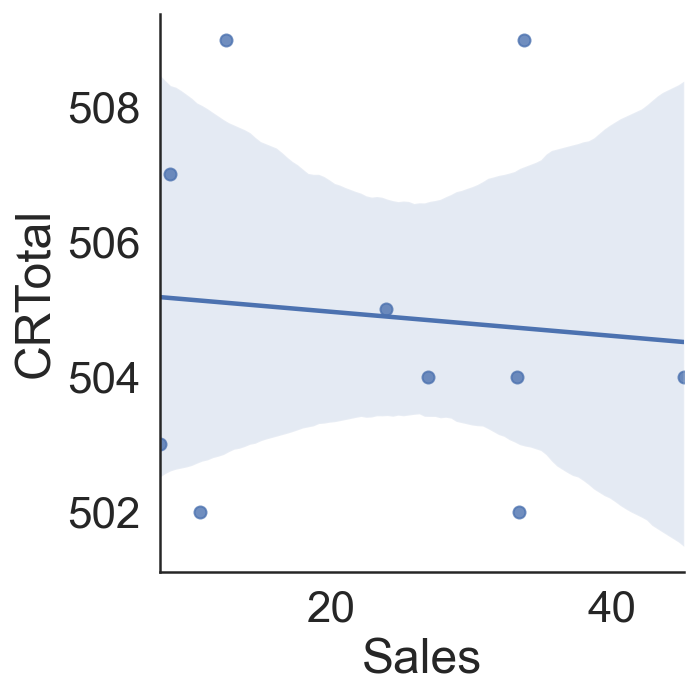

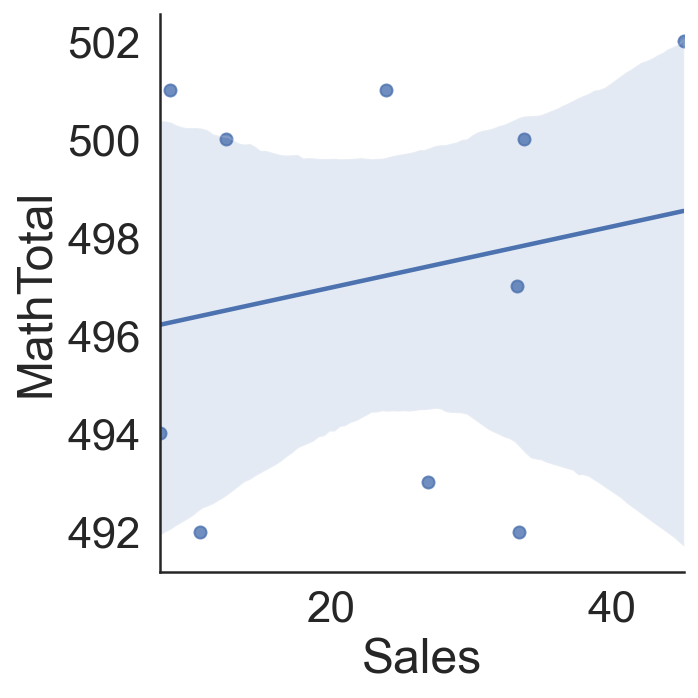

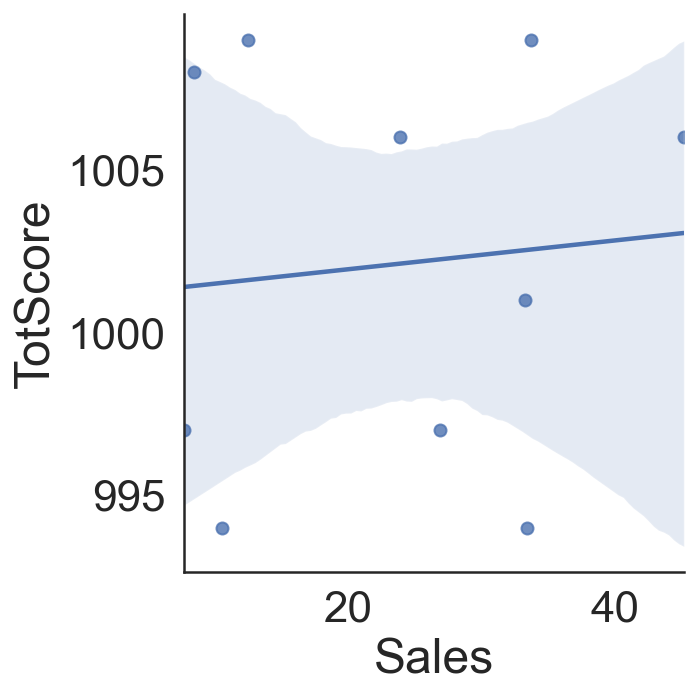

In [57]:
#80's plots
sns.lmplot(x='Sales', y='CRTotal', data=Eightydf)
sns.lmplot(x='Sales', y='MathTotal', data=Eightydf)
sns.lmplot(x='Sales', y='TotScore', data=Eightydf)

The plots for the 80's decade show little to no correaltion between SAT score and video Game sales. All three plots have slight correlation, but have high standard error. This indicates that there is very little definitve correlation. 

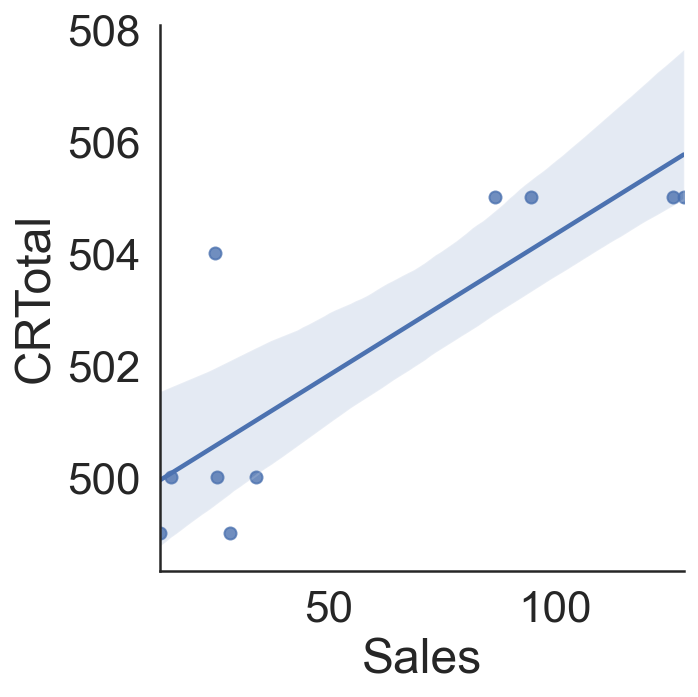

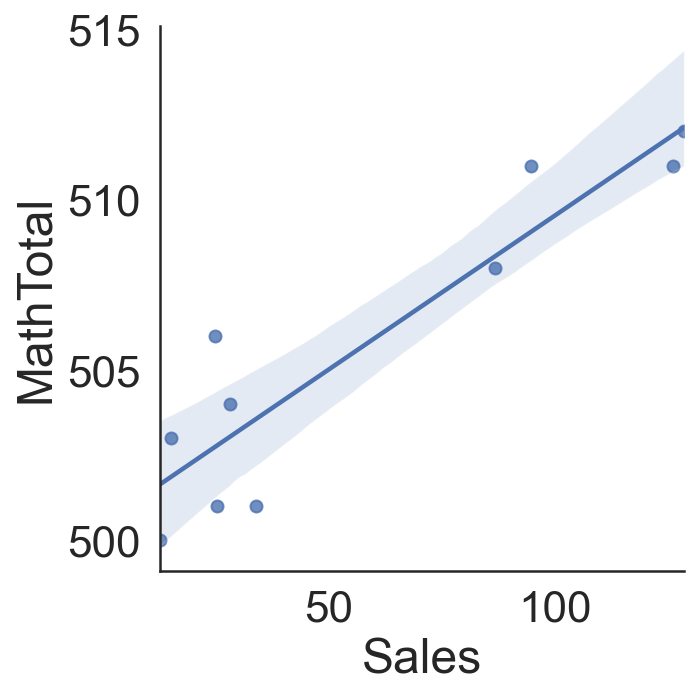

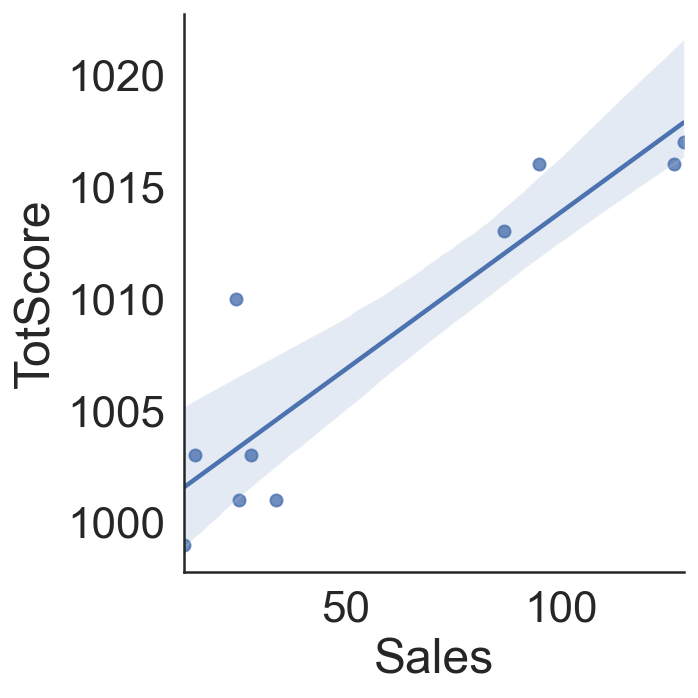

In [58]:
#90's plots
sns.lmplot(x='Sales', y='CRTotal', data=Ninetydf)
sns.lmplot(x='Sales', y='MathTotal', data=Ninetydf)
sns.lmplot(x='Sales', y='TotScore', data=Ninetydf)

The three plots for the 90's decade show strong positive correlations between score and number of video games sold. 

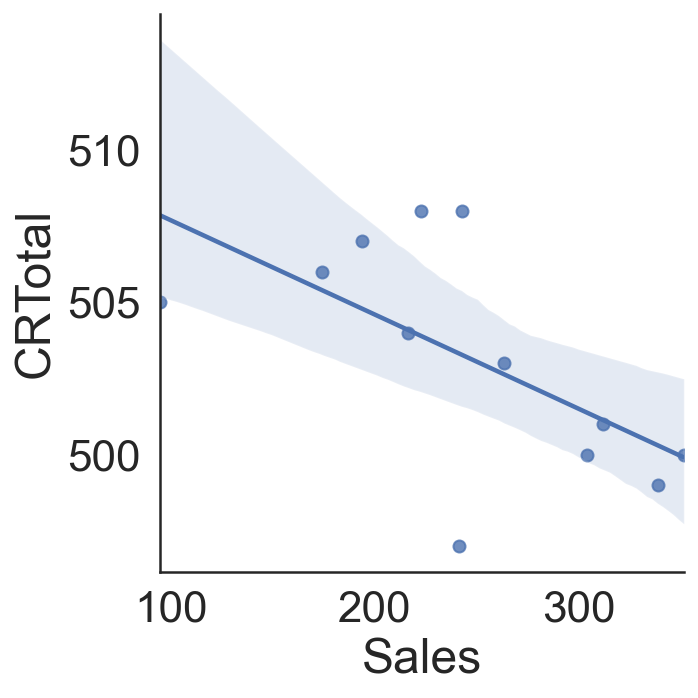

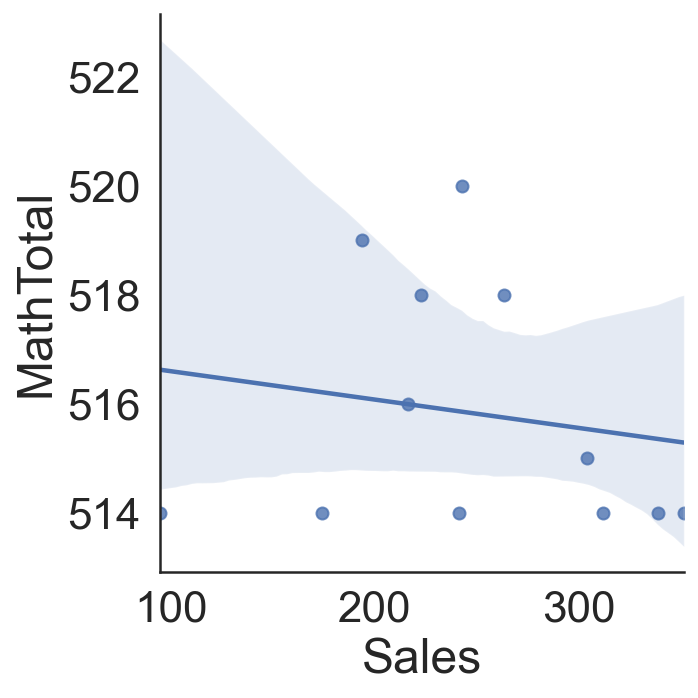

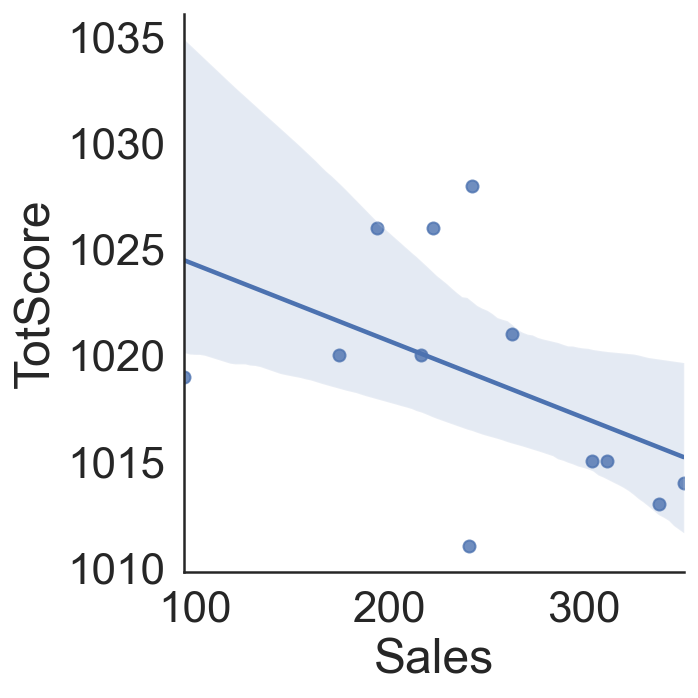

In [59]:
#00's plus 2010 and 2011 plots
sns.lmplot(x='Sales', y='CRTotal', data=Thousanddf)
sns.lmplot(x='Sales', y='MathTotal', data=Thousanddf)
sns.lmplot(x='Sales', y='TotScore', data=Thousanddf)

All three plots for the 00's plus 2010 and 2011 have a negative correlation. The critical reading plot has the lowest. standard error which indicates that it is likley more correalted than math and total score which have large standard error.

Based on the plots for the 80's, 90's, and 00's, the decade in which there was a high correaltion between all three categories of scores (CR, math, and total) was the 90's. In the 80's there seemed to be no correaltion between scores and video game sales, while in the 00's there appears to be a slight negative correaltion between scores and video game sales.

# Ethics & Privacy

We understand that the framing of our question has ethical implications. If our results said that video game sales and SAT scores have a positive correlation, and this information, whether correct or incorrect, was disseminated to the public, it could cause changes in parental or student behavior. Playing video games could be encouraged in this case, and if these results are untrue that could cause students to spend more time playing video games using said results to validate their decision. Vice versa, if our results indicated that video game sales and SAT scores have a negative correlation, it could cause changes in student behavior in which they play video games less than they would have before knowing about the study’s results. The data collection also has ethical implications. However, we are not concerned because the data was collected by the College Board with the consent of students. The analysis could have ethical consequences and implications if we concluded that video game sales and SAT scores are in some way or form correlated. But that was not contingent to our results and does not apply in this situation.


# Conclusion & Discussion

When looking at overall scores across all years, based on the data we collected, the plots of the the data, and linear regression, we conclude that there is a positive correlation between SAT scores and number of video game sales in North America. This means that as video game sales increase, SAT scores also tend increase. However, based on the plots and linear regression, we see that critical reading scores have nearly no correlation with video game sales, while math scores are postiveley correlated. Since the total SAT score is the sum of the reading scores and math scores, this means that a better way to sum up the results of this analysis is that video game sales are correlated with math SAT scores rather than total SAT scores. If both math and critical reading were correlated with video game sales, then there would be more evidence to conclude that video game sales are correlated with total SAT score. Since only math is correlated with video game sales, and the math score makes up 50% of the total score, it is much more definitive to say that video game sales are postiveley correlated with math SAT scores, rather than SAT scores in general. Since the math score makes up 50% of the total SAT score, a postive correleation in math would result in a positve correaltion in total score. This is what we concluded if we only looked at the overall correlation for all years of scores. 

When we looked at how the correlation changed over time, we saw that the 90's decade was highly correlated, while the 80's showed no correlation, and the 00's showed a somewhat negative correlation. For the 90's decade, both the critical reading and math scores increased with video game sales. Since the 90's were highly correlated, while the 80's and 00's we not nearly as correlated, we came to the conclusion that the 90's decade was most responsible for the overall postive correlation between SAT scores and video games sales. In the 00's decade, critical reading scores were the most negativly correlated when compared to math and total score. This likely explains why there is almost no correlation between the overall critical reading scores and video game sales for the entire dataset as the negative 00's counteract the postive 90's. Since the 00's math scores are not nearly as correlated as the critical reading scores, the 00's math score do notcounter act the 90's math scores. Thus, this is why we see no correlation for the critical reading scores across all years and see a postive correaltion for the math scores across all years. One factor that we must consider is that computers became much more common in every household around the 90's. Becasue of this, more people had access to the internet and all of the resources that come with it. This may be a reason why the 90's were so postivley correlated when compared to the other two decades. 

Although the data and analysis displays a positive correlation between overall SAT scores and video game sales, it is impossible to say whether there is any causation. Correlation indicates that SAT scores and video game sales both had upward trends during the years 1980-2011, but without taking other outside factors into consideration, we cannot say that video games attributed to increased SAT scores. Therefore, fter considering both the overall scores versus video game sales, and each decade's score versus video game sales, we can only indicate that there is a positive correlation between the SAT scores and video game sales. 

# Team Contributions

- Yohan Kim   = Data Collection, EDA
- Ryan Tran   = Data Collection, Data Cleaning, Data Analysis & Results
- Matthew Kye = Data Collection, Presentation
- Alex Doo    = Data Collection, Data Analysis & Results / Discussions